#### <B><center>CASE STUDY 01<B></br>
## <B><center>Preprocessing

### <b><u>Prepocessing for Train data

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#### **1.Reading the Training Datatset to Python environment**

In [305]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [306]:
data = pd.read_csv('/content/drive/MyDrive/datasets/case study/train_loan.csv')

In [307]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [309]:
data.shape

(614, 13)

#### <b>2. PREPROCESSING</b>

##### **a) Handling missing values**

In [310]:
data['Loan_ID'].nunique()

614

*Loan_ID is dropping here as it is not contributing to our model*

In [311]:
data = data.drop('Loan_ID',axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [312]:
data.isna().sum()/data.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**Fill missing categorical values with the mode**

In [313]:
for i in ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']:
  data[i].fillna(data[i].mode()[0], inplace=True)

**Fill missing numerical values with the mean or median**

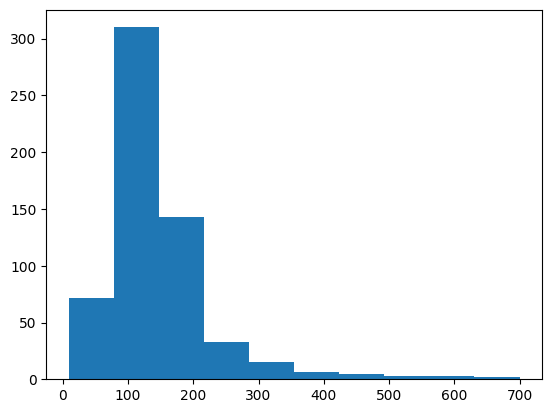

In [314]:
plt.hist(data['LoanAmount'])
plt.show()

*data skewed right, so have to fill the missing values with median*

In [315]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [316]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### **b) Outlier detection**

In [317]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


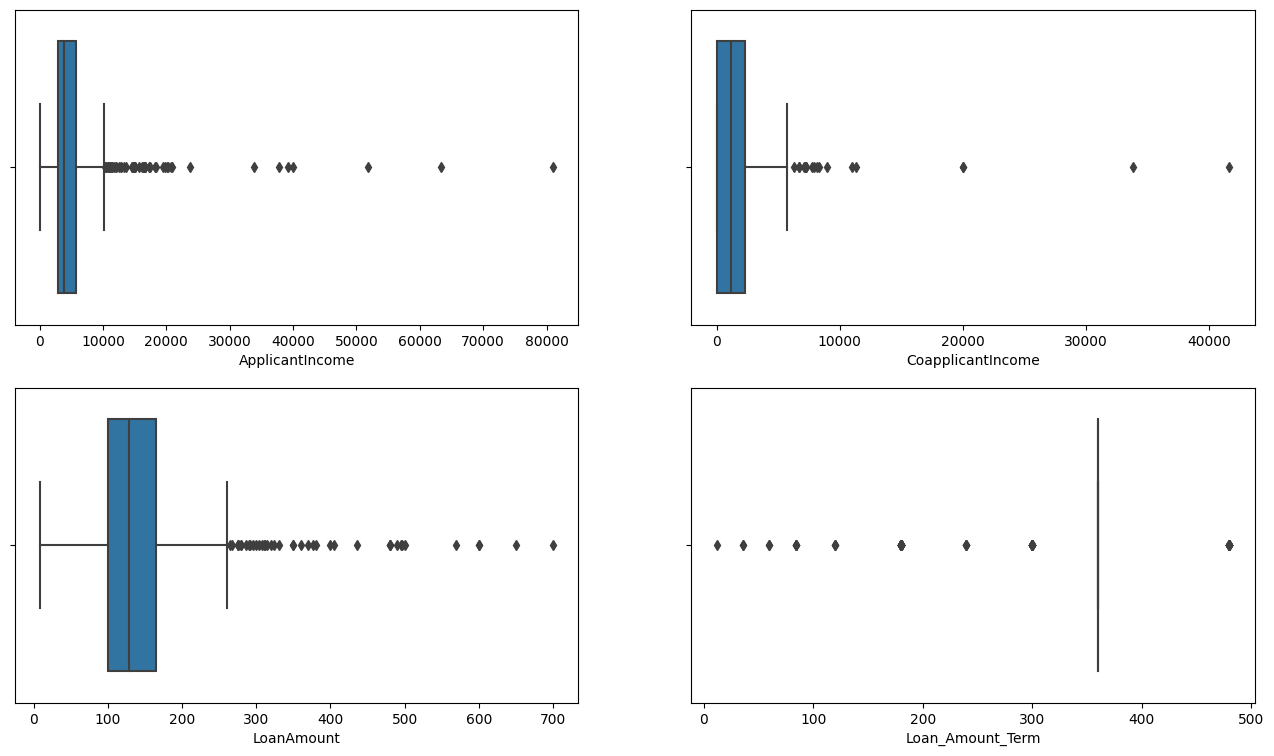

In [318]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x='ApplicantIncome', data=data, orient='v' , ax=axes[0, 0])
sns.boxplot( x= "CoapplicantIncome", data=data, orient='v' , ax=axes[0, 1])
sns.boxplot( x= "LoanAmount", data=data, orient='v' , ax=axes[1, 0])
sns.boxplot( x= "Loan_Amount_Term", data=data, orient='v' , ax=axes[1, 1])
plt.show()

In [319]:
Q1 = np.percentile(data['ApplicantIncome'],25, interpolation='midpoint')
Q2 = np.percentile(data['ApplicantIncome'],50, interpolation='midpoint')
Q3 = np.percentile(data['ApplicantIncome'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['ApplicantIncome']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

<ipython-input-319-1cf3ca8639df>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ApplicantIncome'],25, interpolation='midpoint')
<ipython-input-319-1cf3ca8639df>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ApplicantIncome'],50, interpolation='midpoint')
<ipython-input-319-1cf3ca8639df>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Dep

In [320]:
ind1 = data['ApplicantIncome']>up_lim
data.loc[ind1].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [321]:
data.drop([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],inplace = True)

In [322]:
Q1 = np.percentile(data['CoapplicantIncome'],25, interpolation='midpoint')
Q2 = np.percentile(data['CoapplicantIncome'],50, interpolation='midpoint')
Q3 = np.percentile(data['CoapplicantIncome'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['CoapplicantIncome']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

<ipython-input-322-9e179d0d45d5>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['CoapplicantIncome'],25, interpolation='midpoint')
<ipython-input-322-9e179d0d45d5>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['CoapplicantIncome'],50, interpolation='midpoint')
<ipython-input-322-9e179d0d45d5>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. 

In [323]:
ind1 = data['CoapplicantIncome']>up_lim
data.loc[ind1].index

Int64Index([12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 513, 523,
            581, 600],
           dtype='int64')

In [324]:
data.drop([12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 513, 523,
            581, 600],inplace = True)

In [325]:
Q1 = np.percentile(data['LoanAmount'],25, interpolation='midpoint')
Q2 = np.percentile(data['LoanAmount'],50, interpolation='midpoint')
Q3 = np.percentile(data['LoanAmount'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['LoanAmount']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

<ipython-input-325-be9ac4c070d9>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['LoanAmount'],25, interpolation='midpoint')
<ipython-input-325-be9ac4c070d9>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['LoanAmount'],50, interpolation='midpoint')
<ipython-input-325-be9ac4c070d9>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated Nu

In [326]:
ind1 = data['LoanAmount']>up_lim
data.loc[ind1].index

Int64Index([  5,  21,  65,  83, 152, 159, 161, 212, 233, 236, 255, 260, 325,
            348, 351, 381, 391, 484, 505, 511, 514, 536, 557, 564, 592, 611],
           dtype='int64')

In [327]:
data.drop([  5,  21,  65,  83, 152, 159, 161, 212, 233, 236, 255, 260, 325,
            348, 351, 381, 391, 484, 505, 511, 514, 536, 557, 564, 592, 611],inplace = True)

In [328]:
Q1 = np.percentile(data['Loan_Amount_Term'],25, interpolation='midpoint')
Q2 = np.percentile(data['Loan_Amount_Term'],50, interpolation='midpoint')
Q3 = np.percentile(data['Loan_Amount_Term'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['Loan_Amount_Term']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

<ipython-input-328-f223926e71de>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Loan_Amount_Term'],25, interpolation='midpoint')
<ipython-input-328-f223926e71de>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Loan_Amount_Term'],50, interpolation='midpoint')
<ipython-input-328-f223926e71de>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (D

In [329]:
ind1 = data['Loan_Amount_Term']>up_lim
data.loc[ind1].index

Int64Index([75, 109, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500, 516,
            573],
           dtype='int64')

In [330]:
data.drop([75, 109, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500, 516,
            573],inplace = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


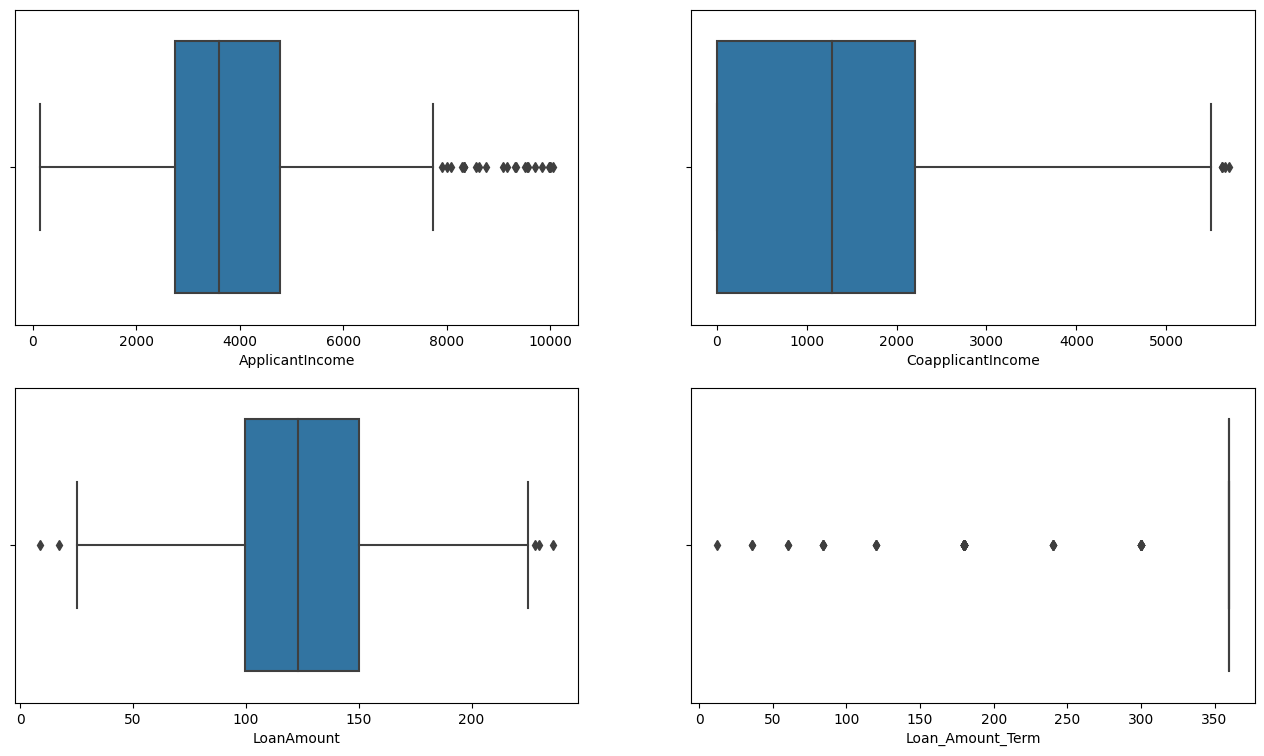

In [331]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x='ApplicantIncome', data=data, orient='v' , ax=axes[0, 0])
sns.boxplot( x= "CoapplicantIncome", data=data, orient='v' , ax=axes[0, 1])
sns.boxplot( x= "LoanAmount", data=data, orient='v' , ax=axes[1, 0])
sns.boxplot( x= "Loan_Amount_Term", data=data, orient='v' , ax=axes[1, 1])
plt.show()

##### **c) Encoding categorical variables using label encoder**

In [332]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [333]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
  data[i] = label_encoder.fit_transform(data[i])

In [334]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


##### **d) Scaling Numerical Variables**

In [335]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,508.000000,508.000000,508.000000,508.00000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,0.812992,0.651575,0.710630,0.25000,0.116142,4007.151575,1320.928976,123.421260,338.385827,0.856299,1.007874
std,0.390302,0.476941,0.989554,0.43344,0.320711,1800.334010,1402.181260,40.430666,62.983614,0.351132,0.789438
min,0.000000,0.000000,0.000000,0.00000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.00000,0.000000,2744.000000,0.000000,99.750000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,3594.500000,1283.500000,123.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.25000,0.000000,4770.500000,2202.250000,150.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.00000,1.000000,10047.000000,5701.000000,236.000000,360.000000,1.000000,2.000000


In [336]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [337]:
data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = sc.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [338]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,508.000000,508.000000,508.000000,508.00000,508.000000,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,508.000000,508.000000
mean,0.812992,0.651575,0.710630,0.25000,0.116142,-8.042560e-17,2.447736e-17,-9.616105e-17,-4.335989e-16,0.856299,1.007874
std,0.390302,0.476941,0.989554,0.43344,0.320711,1.000986e+00,1.000986e+00,1.000986e+00,1.000986e+00,0.351132,0.789438
min,0.000000,0.000000,0.000000,0.00000,0.000000,-2.144576e+00,-9.429815e-01,-2.832851e+00,-5.187183e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.00000,0.000000,-7.023123e-01,-9.429815e-01,-5.860550e-01,3.435096e-01,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,-2.294343e-01,-2.671971e-02,-1.042959e-02,3.435096e-01,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.25000,0.000000,4.244217e-01,6.291553e-01,6.580386e-01,3.435096e-01,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.00000,1.000000,3.358156e+00,3.126834e+00,2.787234e+00,3.435096e-01,1.000000,2.000000


*Now splitting our target variable from independant features*

In [339]:
x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

***Now our train dataframe has been preprocessed with handling missing values, outlier detection and handling, encoding categorical variables, and scaling numerical variables. Next we have to do the same preprocessing steps for our testing dataset***

<br><br><br>



### <b><u>Prepocessing for Test data

#### **1.Reading the Training Datatset to Python environment**

In [340]:
data = pd.read_csv('/content/drive/MyDrive/datasets/case study/test_loan.csv')

In [341]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### <b>2. PREPROCESSING</b>

In [343]:
data.shape

(367, 12)

##### **a) Handling missing values**

In [344]:
data['Loan_ID'].nunique()

367

*Loan_ID is dropping here as it is not contributing to our model*

In [345]:
data = data.drop('Loan_ID',axis=1)


In [346]:
data.isna().sum()/data.shape[0]*100

Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

**Fill missing categorical values with the mode**

In [347]:
for i in ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']:
  data[i].fillna(data[i].mode()[0], inplace=True)

**Fill missing numerical values with the mean or median**

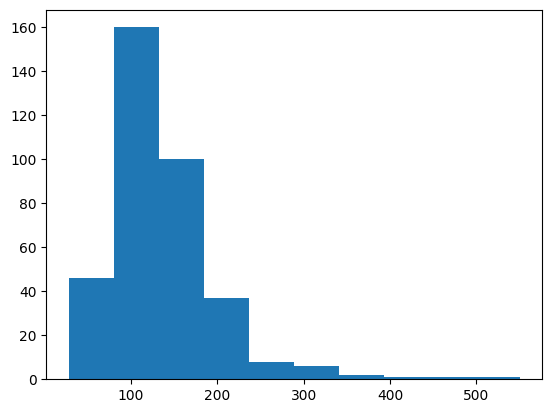

In [348]:
plt.hist(data['LoanAmount'])
plt.show()

*data skewed right, so have to fill the missing values with median*

In [349]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [350]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##### **b) Outlier detection**

In [351]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


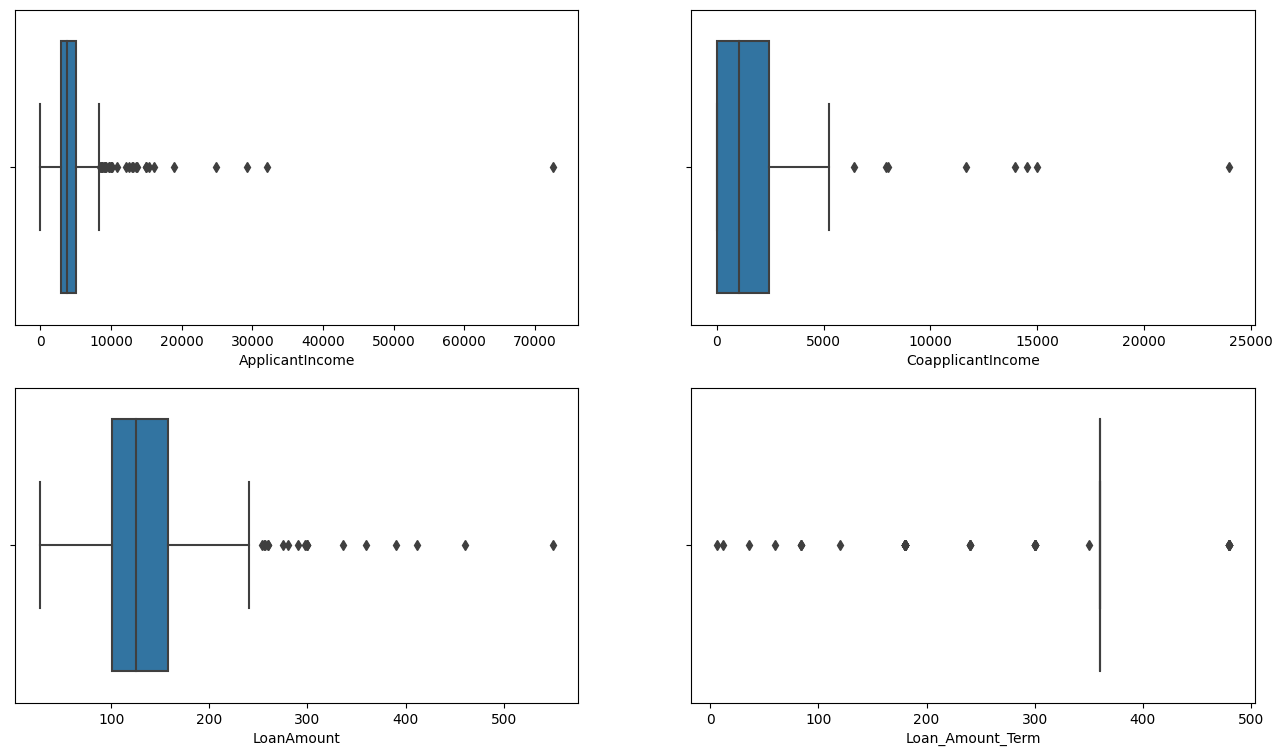

In [352]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x='ApplicantIncome', data=data, orient='v' , ax=axes[0, 0])
sns.boxplot( x= "CoapplicantIncome", data=data, orient='v' , ax=axes[0, 1])
sns.boxplot( x= "LoanAmount", data=data, orient='v' , ax=axes[1, 0])
sns.boxplot( x= "Loan_Amount_Term", data=data, orient='v' , ax=axes[1, 1])
plt.show()

In [353]:
Q1 = np.percentile(data['ApplicantIncome'],25, interpolation='midpoint')
Q2 = np.percentile(data['ApplicantIncome'],50, interpolation='midpoint')
Q3 = np.percentile(data['ApplicantIncome'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['ApplicantIncome']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

ind1 = data['ApplicantIncome']>up_lim
data.loc[ind1].index

<ipython-input-353-90962393df38>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ApplicantIncome'],25, interpolation='midpoint')
<ipython-input-353-90962393df38>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ApplicantIncome'],50, interpolation='midpoint')
<ipython-input-353-90962393df38>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Dep

Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')

In [354]:
data.drop([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],inplace = True)

In [355]:
Q1 = np.percentile(data['CoapplicantIncome'],25, interpolation='midpoint')
Q2 = np.percentile(data['CoapplicantIncome'],50, interpolation='midpoint')
Q3 = np.percentile(data['CoapplicantIncome'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['CoapplicantIncome']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

ind1 = data['CoapplicantIncome']>up_lim
data.loc[ind1].index

<ipython-input-355-93f1c24808ea>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['CoapplicantIncome'],25, interpolation='midpoint')
<ipython-input-355-93f1c24808ea>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['CoapplicantIncome'],50, interpolation='midpoint')
<ipython-input-355-93f1c24808ea>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. 

Int64Index([25, 85, 123, 237, 351], dtype='int64')

In [356]:
data.drop([25, 85, 123, 237, 351],inplace = True)

In [357]:
Q1 = np.percentile(data['LoanAmount'],25, interpolation='midpoint')
Q2 = np.percentile(data['LoanAmount'],50, interpolation='midpoint')
Q3 = np.percentile(data['LoanAmount'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['LoanAmount']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

ind1 = data['LoanAmount']>up_lim
data.loc[ind1].index

<ipython-input-357-abcda711e60c>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['LoanAmount'],25, interpolation='midpoint')
<ipython-input-357-abcda711e60c>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['LoanAmount'],50, interpolation='midpoint')
<ipython-input-357-abcda711e60c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated Nu

Int64Index([24, 27, 73, 96, 189, 345], dtype='int64')

In [358]:
data.drop([24, 27, 73, 96, 189, 345],inplace = True)

In [359]:
Q1 = np.percentile(data['Loan_Amount_Term'],25, interpolation='midpoint')
Q2 = np.percentile(data['Loan_Amount_Term'],50, interpolation='midpoint')
Q3 = np.percentile(data['Loan_Amount_Term'],75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['Loan_Amount_Term']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

ind1 = data['Loan_Amount_Term']>up_lim
data.loc[ind1].index

<ipython-input-359-f6c6c1590689>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Loan_Amount_Term'],25, interpolation='midpoint')
<ipython-input-359-f6c6c1590689>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Loan_Amount_Term'],50, interpolation='midpoint')
<ipython-input-359-f6c6c1590689>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (D

Int64Index([82, 101, 222, 239, 250, 266, 295], dtype='int64')

In [360]:
data.drop([82, 101, 222, 239, 250, 266, 295],inplace = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


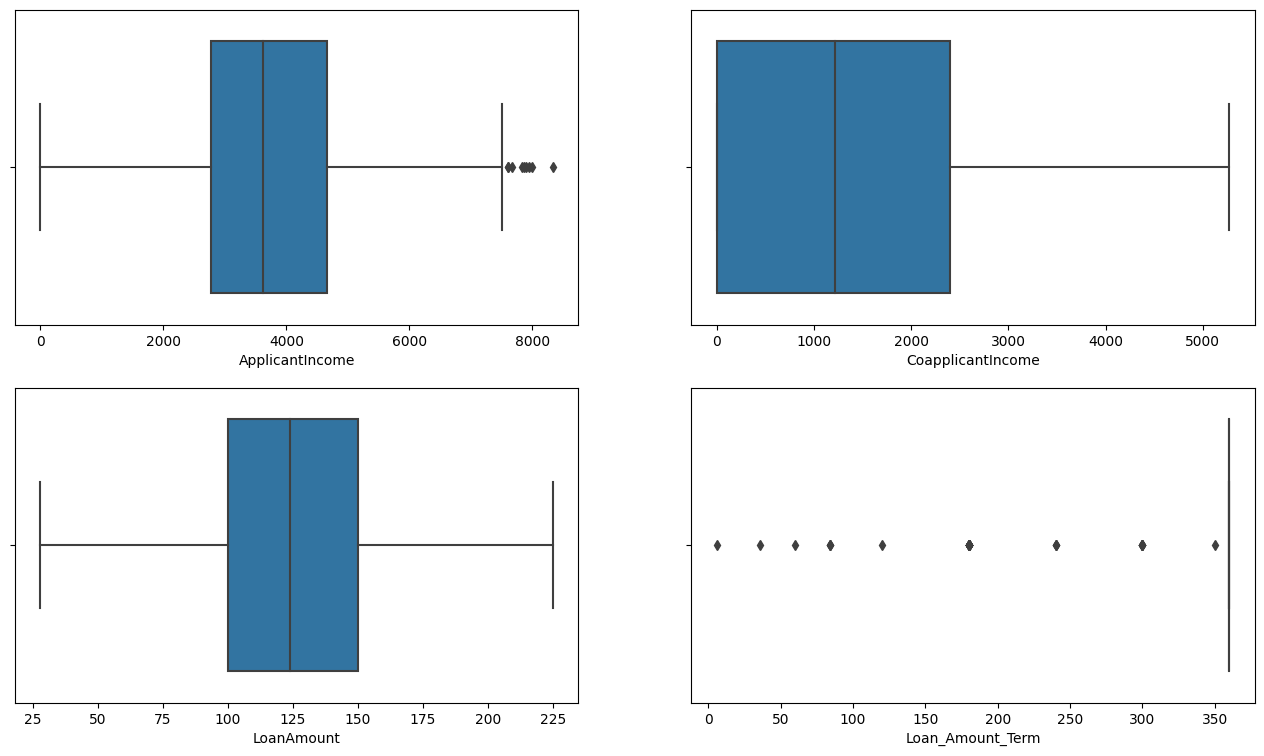

In [361]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x='ApplicantIncome', data=data, orient='v' , ax=axes[0, 0])
sns.boxplot( x= "CoapplicantIncome", data=data, orient='v' , ax=axes[0, 1])
sns.boxplot( x= "LoanAmount", data=data, orient='v' , ax=axes[1, 0])
sns.boxplot( x= "Loan_Amount_Term", data=data, orient='v' , ax=axes[1, 1])
plt.show()

##### **c) Encoding categorical variables using label encoder**

In [362]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [363]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
  data[i] = label_encoder.fit_transform(data[i])

In [364]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


##### **d) Scaling Numerical Variables**

In [365]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,0.804416,0.621451,0.766562,0.242902,0.094637,3826.741325,1393.141956,124.936909,339.886435,0.842271,1.085174
std,0.397276,0.485792,1.044463,0.429514,0.293176,1505.703098,1432.165799,39.048361,61.394035,0.365063,0.812677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2773.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3613.000000,1213.000000,124.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,4667.000000,2400.000000,150.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,8333.000000,5272.000000,225.000000,360.000000,1.000000,2.000000


In [366]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [367]:
data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = sc.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [368]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,317.000000,317.000000,317.000000,317.000000,317.000000,3.170000e+02,3.170000e+02,3.170000e+02,3.170000e+02,317.000000,317.000000
mean,0.804416,0.621451,0.766562,0.242902,0.094637,-1.512985e-16,5.603649e-18,-9.526204e-17,-3.474263e-16,0.842271,1.085174
std,0.397276,0.485792,1.044463,0.429514,0.293176,1.001581e+00,1.001581e+00,1.001581e+00,1.001581e+00,0.365063,0.812677
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.545516e+00,-9.742898e-01,-2.486408e+00,-5.447016e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-7.009399e-01,-9.742898e-01,-6.396257e-01,3.281323e-01,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-1.421789e-01,-1.259818e-01,-2.403148e-02,3.281323e-01,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5.589330e-01,7.041433e-01,6.428622e-01,3.281323e-01,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,2.997525e+00,2.712668e+00,2.566594e+00,3.281323e-01,1.000000,2.000000


***Now the test data is also been preprocessed, similar to how we preprocessed the training dataset.***